# Animator - Basic Use

In [1]:
import sys
# sys.path.append('../')
sys.path.append('Documents/aus400/aus400-cookbook/')#sys.path.append('Aus400/aus400-cookbook/')
import aus400
# from aus400.render import set_image_mpl_cmap, field_to_image
from aus400.support import *
from aus400.animator import *

import io
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cartopy.mpl.geoaxes
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pandas as pd

import PIL
from PIL import ImageFilter, ImageOps
from typing import Tuple

import dask
import dask.diagnostics
from dask.distributed import Client, LocalCluster, Scheduler

In [2]:
# set up Dask client

try:
    client
except:
    cluster = LocalCluster()
    client = Client(cluster)
client

# from dask_jobqueue import SLURMCluster
# cluster = SLURMCluster(cores=16,memory="31GB")
# client = Client(cluster)
# cluster.scale(cores=32)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 32823 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/32823/status,
Dashboard: /proxy/32823/status,Workers: 4
Total threads: 4,Total memory: 11.23 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36781,Workers: 4
Dashboard: /proxy/32823/status,Total threads: 4
Started: Just now,Total memory: 11.23 GiB
Comm: tcp://127.0.0.1:46147,Total threads: 1
Dashboard: /proxy/41311/status,Memory: 2.81 GiB
Nanny: tcp://127.0.0.1:33701,


In [3]:
var = "spec_hum"
res = "d0036"
data = aus400.cat.load_var(resolution = res, stream = "spec", variable = var, ensemble = 0).squeeze()
data

<xarray.DataArray 'spec_hum' (time: 354, latitude: 10554, longitude: 13194)>
dask.array<getitem, shape=(354, 10554, 13194), dtype=float32, chunksize=(1, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) datetime64[ns] 2017-03-26T12:10:00 ... 20...
  * latitude                 (latitude) float32 -46.8 -46.79 ... -8.81 -8.806
  * longitude                (longitude) float64 109.5 109.5 ... 157.0 157.0
    forecast_reference_time  datetime64[ns] ...
    level_height             float64 ...
    model_level_number       int32 ...
    sigma                    float64 ...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    ensemble                 int64 0
Attributes:
    standard_name:           specific_humidity
    units:                   kg kg-1
    source:                  Data from Met Office Unified Model
    um_version:              11.4
    STASH:                   [ 1  0 10]
    um_stash_source:         m01s00i010
    long_name:               SPECIFIC HUMIDITY AFTER TIMESTEP
    stash_code:              10
    wgdos_packing_accuracy:  2^-24
    description:             Specific humidity (a measure of atmospheric wate...
    resolution:              d0036
    stream:                  spec

In [4]:
if var == "max_refl":
    vmin, vmax = -40, 80
    cmap = "gist_ncar"
    
elif var == "max_wndgust10m":
    vmin, vmax = 0, 50
    cmap = "cubehelix"
    
elif var == "spec_hum":
    vmin, vmax = 0, 0.025
    cmap = "jet"
    
else:
    vmin, vmax = 0, 1
    cmap = "rainbow"

In [5]:
test = DataHolder(data)

In [6]:
test.set_size_preset("1080p")

In [7]:
test.centre_on_index(7793, 11454)

In [8]:
testAnim = Animator(test, vmin, vmax)
testAnim.load_cmap(cmap)

CPU times: user 3.66 s, sys: 1.56 s, total: 5.22 s
Wall time: 8.41 s


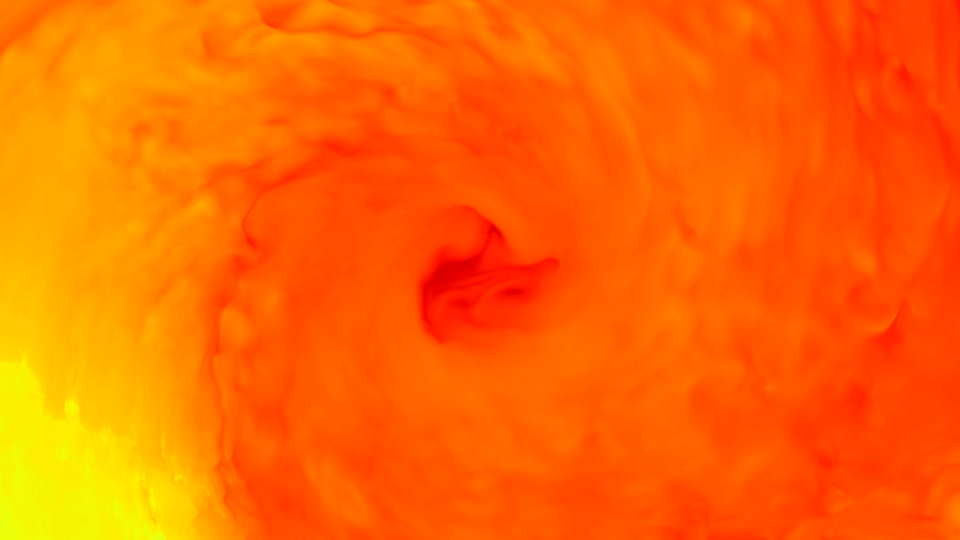

In [9]:
%%time
image = testAnim.draw_image(0, preload = True, preload_cap = 30)
image.reduce(2)

In [10]:
%%time
anim = testAnim.animate('anim', length=10, start_point=0, frame_duration=40)
anim

CPU times: user 1.28 s, sys: 131 ms, total: 1.41 s
Wall time: 1.5 s
